<a href="https://colab.research.google.com/github/mokselb/AD/blob/main/lab2(PCA_%2B_tSNE_%2B_k_Means_%2B_NLTK).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [113]:
import pandas as pd
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans

import nltk
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer, WordNetLemmatizer
import re
import string
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
df = pd.read_csv("breast-cancer.csv")
df.drop('id', axis=1, inplace = True)
df.rename(columns={'diagnosis' : 'target'}, inplace = True)
df.head()

,target,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


В першій лабі я використав вручну мін-макс скейлінг, цього разускористаюсь вже готовим скейлером

In [ ]:
scaler = StandardScaler()
X = df.drop('target', axis = 1)
y = df['target']
scaled_X = scaler.fit_transform(X)

Тепер змінемо розмірність наших данних

In [ ]:
scaled_X.shape

(569, 30)

Як бачимо, зараз наша розмірність 30, застосуємо PCA щоб отримати 2

In [ ]:
pca = PCA(n_components = 2)
X_pca = pca.fit_transform(scaled_X)
X_pca.shape

(569, 2)

In [ ]:
X_pca

array([[ 9.19283683,  1.94858307],
       [ 2.3878018 , -3.76817174],
       [ 5.73389628, -1.0751738 ],
       ...,
       [ 1.25617928, -1.90229671],
       [10.37479406,  1.67201011],
       [-5.4752433 , -0.67063679]])

Покажемо наші дані на графіку

Text(0, 0.5, 'Second component')

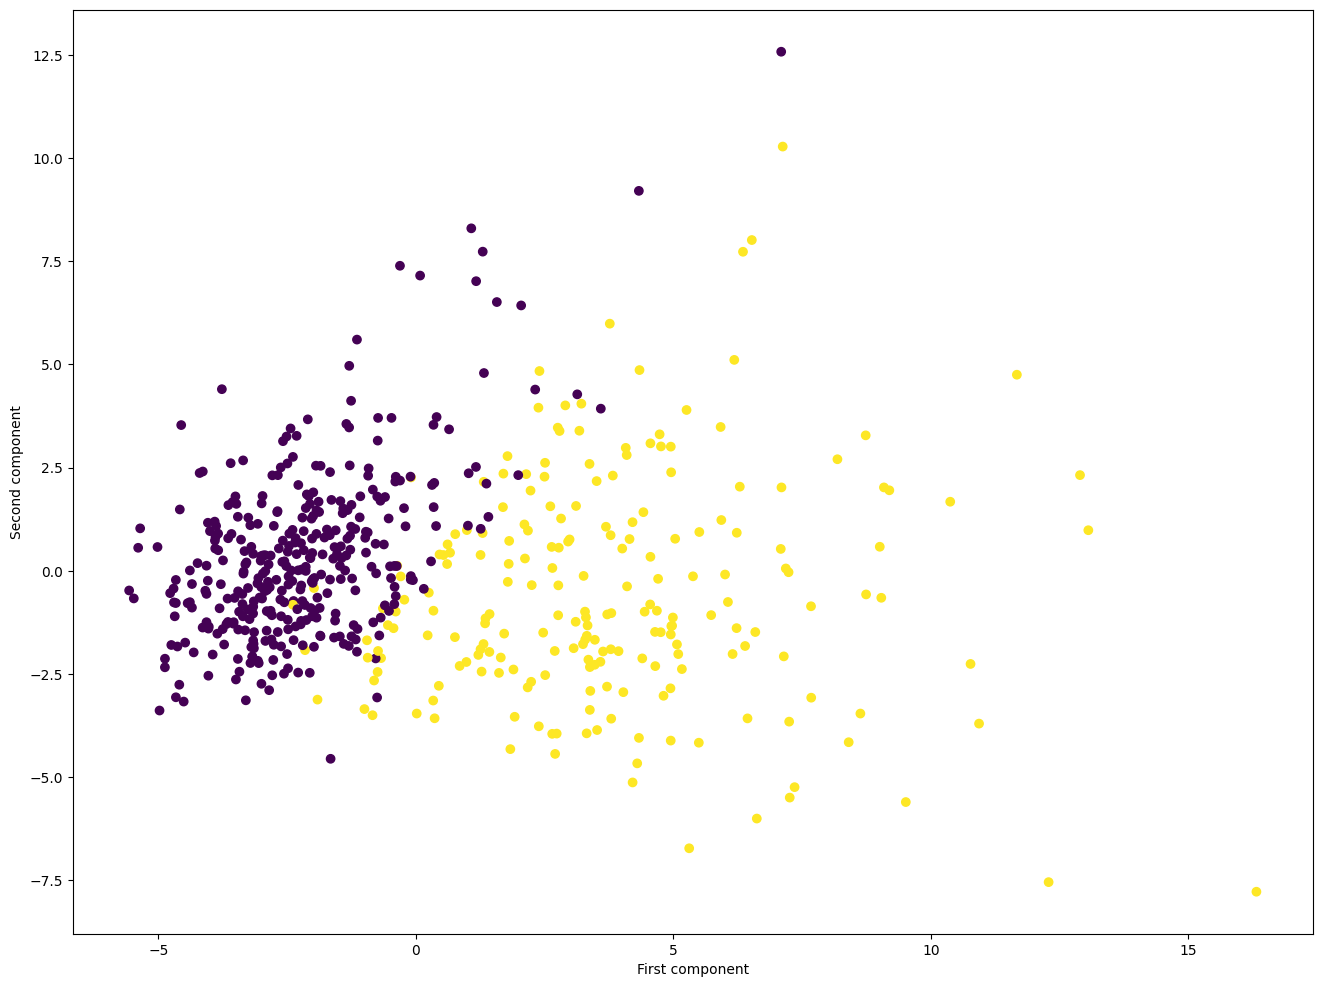

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(X_pca[:,0],X_pca[:,1],c = y)
plt.xlabel('First component')
plt.ylabel('Second component')

Тепер скористаємося TSNE

In [ ]:
tsne = TSNE(n_components = 2)
X_tsne = tsne.fit_transform(scaled_X)
X_tsne.shape

(569, 2)

In [ ]:
X_tsne

array([[ 33.27749  ,  -3.6246672],
       [ 20.427671 , -11.771338 ],
       [ 29.528013 ,  -5.810834 ],
       ...,
       [ 13.44051  ,  -9.823674 ],
       [ 31.902275 ,  -1.9255751],
       [-26.698229 ,  -1.9333501]], dtype=float32)

Text(0, 0.5, 'tsne_2')

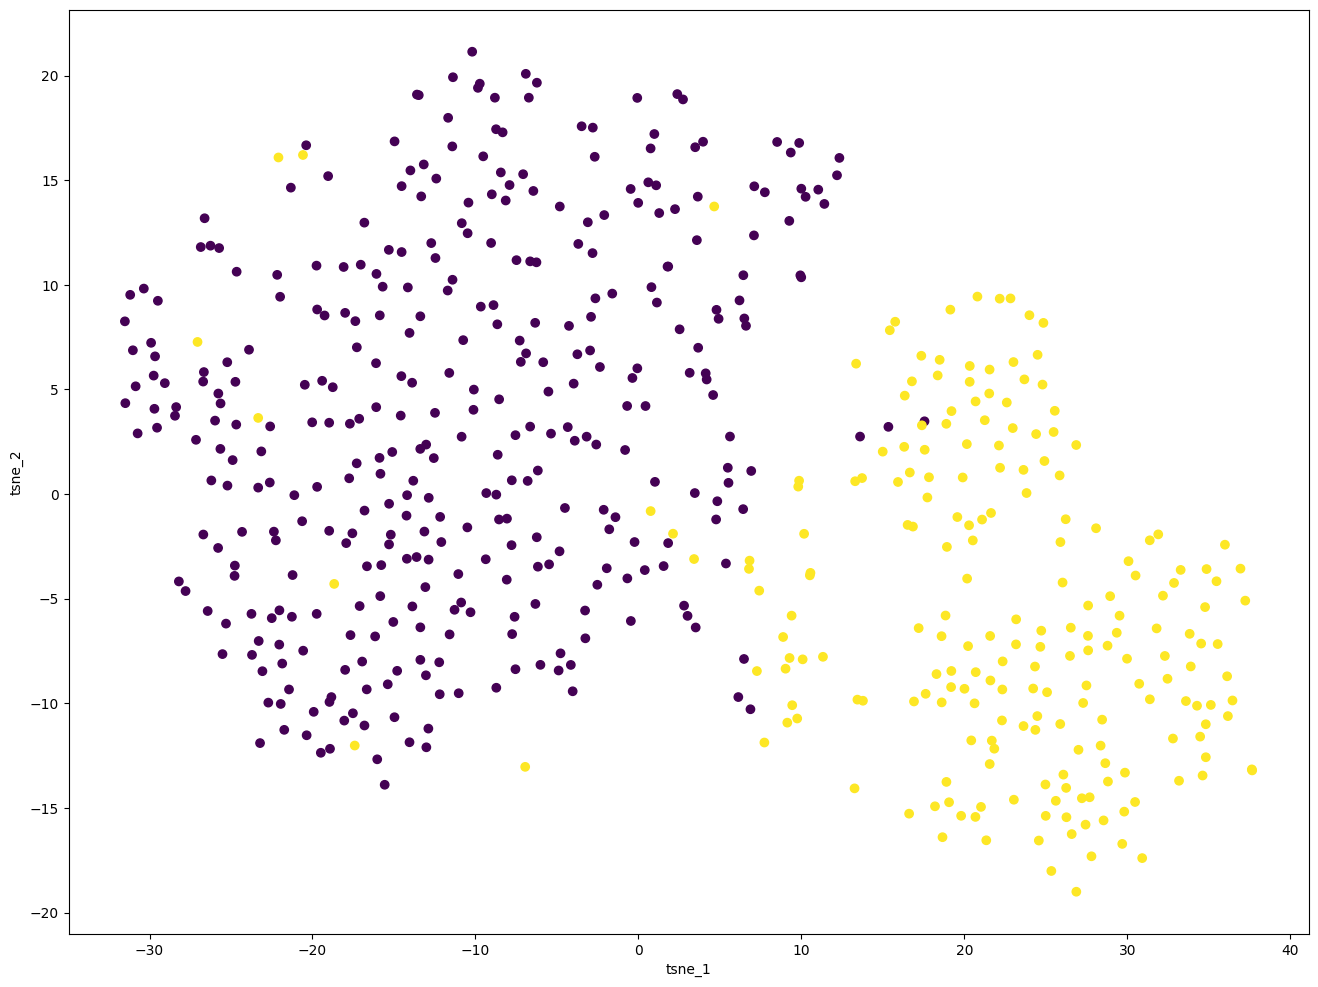

In [ ]:
plt.figure(figsize=(16,12))
plt.scatter(X_tsne[:,0],X_tsne[:,1],c = y)
plt.xlabel('tsne_1')
plt.ylabel('tsne_2')

Перейдемо до завдання квантування зображення

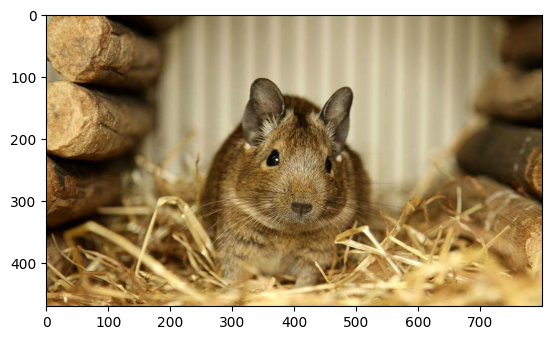

In [34]:
degu = mpl.image.imread('degu.jpg')
plt.imshow(degu)

In [36]:
degu.shape

(470, 800, 3)

In [37]:
X = degu.reshape(-1,3)
X.shape

(376000, 3)

Глибина 64:

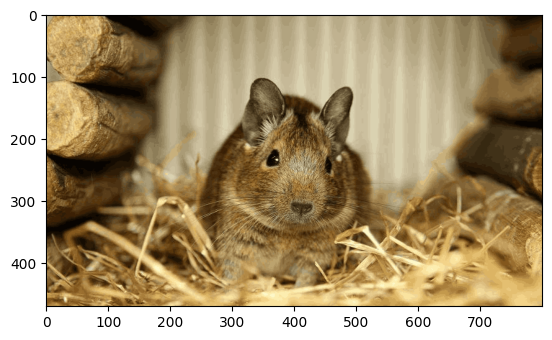

In [39]:
kmeans = KMeans(n_clusters = 64, n_init = 'auto')
kmeans.fit(X)
quan_img_64 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_64 = quan_img_64.reshape(degu.shape)
plt.imshow(quan_img_64 / 255)

Вже зараз можна побачити втрату кольорів якщо подивитися на ліву дерев'яшку

Тепер глибина 32

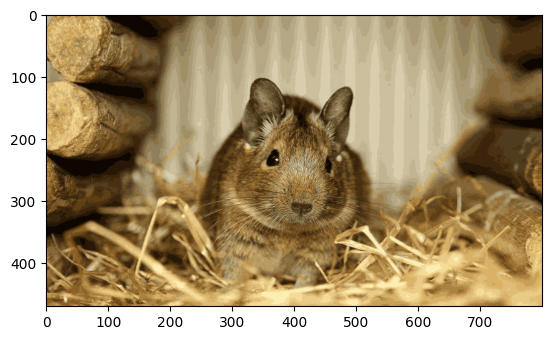

In [40]:
kmeans = KMeans(n_clusters = 32, n_init = 'auto')
kmeans.fit(X)
quan_img_32 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_32 = quan_img_32.reshape(degu.shape)
plt.imshow(quan_img_32 / 255)

Тут вже можна побачити втрату насиченості хутра білочки та плавання заднього фону

Тепер глибина 16

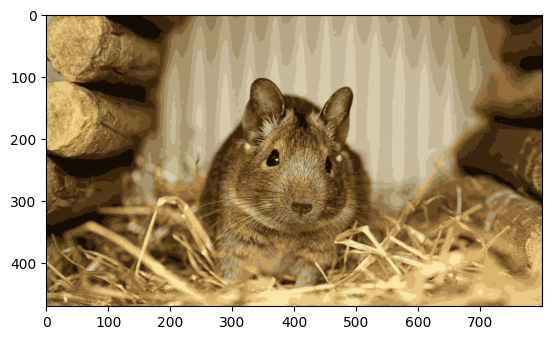

In [41]:
kmeans = KMeans(n_clusters = 16, n_init = 'auto')
kmeans.fit(X)
quan_img_16 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_16 = quan_img_16.reshape(degu.shape)
plt.imshow(quan_img_16 / 255)

Задній фон втратив ще більше кольорів, білочка стає сірішою, дерев'яшки теж пливуть

Тепер 8

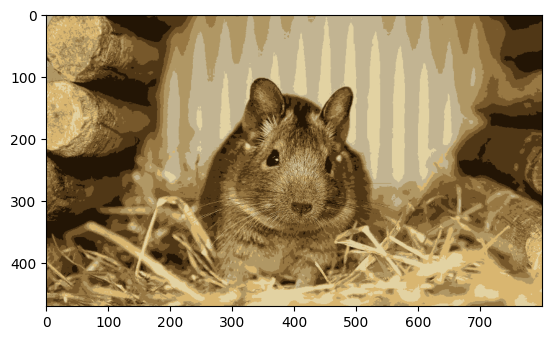

In [42]:
kmeans = KMeans(n_clusters = 8, n_init = 'auto')
kmeans.fit(X)
quan_img_8 = kmeans.cluster_centers_[kmeans.labels_]
quan_img_8 = quan_img_8.reshape(degu.shape)
plt.imshow(quan_img_8 / 255)

Як бачимо, багато об'єктів вже втратили свій рельєф, але білочку досі досі можна зрозуміти повноцінно

Перейдемо до обробки та класифікації текстовий данних

In [140]:
text = pd.read_csv('Mental Health Dataset.csv')

In [141]:
text.head

<bound method NDFrame.head of                                                    posts      predicted  \
0      I know as parent of child with down syndrome t...       negative   
1      but in my heart I know this is the future prom...        neutral   
2      I have mylefibrosis which turn to leukemia the...       negative   
3      from one of my health group subject wayne dyer...        neutral   
4      gmos now link to leukemia http nsnbc I 2013 07...        neutral   
...                                                  ...            ...   
10387  hey everyone I am a 25 year old male I work ou...       negative   
10388  have surgery for stage 1 colon cancer 1 year a...  very negative   
10389  the doctor advise we he could not remove the a...        neutral   
10390  my 66 year old father have been through so muc...        neutral   
10391  I have bein have a bloody stool since last yea...       negative   

       intensity  
0             -1  
1              0  
2           

In [142]:
text.shape

(10392, 3)

Залишимо лише текст та саму оцінку від -2 до 1

In [143]:
text.drop('predicted', axis = 1, inplace = True)
text.shape

(10392, 2)

In [144]:
text.head

<bound method NDFrame.head of                                                    posts  intensity
0      I know as parent of child with down syndrome t...         -1
1      but in my heart I know this is the future prom...          0
2      I have mylefibrosis which turn to leukemia the...         -1
3      from one of my health group subject wayne dyer...          0
4      gmos now link to leukemia http nsnbc I 2013 07...          0
...                                                  ...        ...
10387  hey everyone I am a 25 year old male I work ou...         -1
10388  have surgery for stage 1 colon cancer 1 year a...         -2
10389  the doctor advise we he could not remove the a...          0
10390  my 66 year old father have been through so muc...          0
10391  I have bein have a bloody stool since last yea...         -1

[10392 rows x 2 columns]>

Для зручності відразу прейменуємо оцінку в таргет

In [145]:
text.rename(columns ={'intensity' : 'target'}, inplace = True)
text.head

<bound method NDFrame.head of                                                    posts  target
0      I know as parent of child with down syndrome t...      -1
1      but in my heart I know this is the future prom...       0
2      I have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc I 2013 07...       0
...                                                  ...     ...
10387  hey everyone I am a 25 year old male I work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  I have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

Перед тим як видаляти зайві символи та пунктуацію, видалимо всі посилання, згадування та хештеги

In [146]:
text['posts'] = text['posts'].astype(str)
text['posts'] = text['posts'].apply(lambda x: re.sub(r'https?://\S+', '', x))
text['posts'] = text['posts'].apply(lambda x: re.sub(r'[@#]\S+', '', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      I know as parent of child with down syndrome t...      -1
1      but in my heart I know this is the future prom...       0
2      I have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc I 2013 07...       0
...                                                  ...     ...
10387  hey everyone I am a 25 year old male I work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  I have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

Зведемо все до маленьких літер

In [147]:
text['posts'] = text['posts'].str.lower()
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i 2013 07...       0
...                                                  ...     ...
10387  hey everyone i am a 25 year old male i work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

Тепер видалимо всю пунктуацію

In [148]:
text['posts'] = text['posts'].apply(lambda x: re.sub(r'[^\w\s]', '', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i 2013 07...       0
...                                                  ...     ...
10387  hey everyone i am a 25 year old male i work ou...      -1
10388  have surgery for stage 1 colon cancer 1 year a...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my 66 year old father have been through so muc...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

Тепер цифри

In [149]:
text['posts'] = text['posts'].apply(lambda x: re.sub(r'\d', '', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i    gmo ...       0
...                                                  ...     ...
10387  hey everyone i am a  year old male i work out ...      -1
10388  have surgery for stage  colon cancer  year ago...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my  year old father have been through so much ...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

Прибираємо зайві пробіли

In [150]:
text['posts'] = text['posts'].apply(lambda x: re.sub(r'\s{2,}', ' ', x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      i know as parent of child with down syndrome t...      -1
1      but in my heart i know this is the future prom...       0
2      i have mylefibrosis which turn to leukemia the...      -1
3      from one of my health group subject wayne dyer...       0
4      gmos now link to leukemia http nsnbc i gmo now...       0
...                                                  ...     ...
10387  hey everyone i am a year old male i work out e...      -1
10388  have surgery for stage colon cancer year ago m...      -2
10389  the doctor advise we he could not remove the a...       0
10390  my year old father have been through so much i...       0
10391  i have bein have a bloody stool since last yea...      -1

[10392 rows x 2 columns]>

Перейдемо до стоп-слів

In [151]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [152]:
stop_words = stopwords.words('english')
text['posts'] = text['posts'].apply(lambda x: ' '.join([word for word in x.split() if word not in stop_words]))
text.head

<bound method NDFrame.head of                                                    posts  target
0      know parent child syndrome hear child high ris...      -1
1      heart know future promise article regardless h...       0
2      mylefibrosis turn leukemia want stem cell tran...      -1
3      one health group subject wayne dyer leukemia c...       0
4      gmos link leukemia http nsnbc gmo link leukemi...       0
...                                                  ...     ...
10387  hey everyone year old male work eat pretty hea...      -1
10388  surgery stage colon cancer year ago cea level ...      -2
10389  doctor advise could remove abnormal polyp chri...       0
10390  year old father much past year really need try...       0
10391  bein bloody stool since last year start around...      -1

[10392 rows x 2 columns]>

Тепер необхідно провести стемінг та лематизацію

In [153]:
porter_stemmer = PorterStemmer()
wordnet_lemmatizer = WordNetLemmatizer()

Але перед цим зробимо ще токенізацію

In [154]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

Без цього воно не хотіло працювати 😥

In [155]:
text['posts'] = text['posts'].apply(lambda x: word_tokenize(x))
text.head

<bound method NDFrame.head of                                                    posts  target
0      [know, parent, child, syndrome, hear, child, h...      -1
1      [heart, know, future, promise, article, regard...       0
2      [mylefibrosis, turn, leukemia, want, stem, cel...      -1
3      [one, health, group, subject, wayne, dyer, leu...       0
4      [gmos, link, leukemia, http, nsnbc, gmo, link,...       0
...                                                  ...     ...
10387  [hey, everyone, year, old, male, work, eat, pr...      -1
10388  [surgery, stage, colon, cancer, year, ago, cea...      -2
10389  [doctor, advise, could, remove, abnormal, poly...       0
10390  [year, old, father, much, past, year, really, ...       0
10391  [bein, bloody, stool, since, last, year, start...      -1

[10392 rows x 2 columns]>

In [156]:
text['posts'] = text['posts'].apply(lambda tokens: [porter_stemmer.stem(token) for token in tokens])
text.head

<bound method NDFrame.head of                                                    posts  target
0      [know, parent, child, syndrom, hear, child, hi...      -1
1      [heart, know, futur, promis, articl, regardles...       0
2      [mylefibrosi, turn, leukemia, want, stem, cell...      -1
3      [one, health, group, subject, wayn, dyer, leuk...       0
4      [gmo, link, leukemia, http, nsnbc, gmo, link, ...       0
...                                                  ...     ...
10387  [hey, everyon, year, old, male, work, eat, pre...      -1
10388  [surgeri, stage, colon, cancer, year, ago, cea...      -2
10389  [doctor, advis, could, remov, abnorm, polyp, c...       0
10390  [year, old, father, much, past, year, realli, ...       0
10391  [bein, bloodi, stool, sinc, last, year, start,...      -1

[10392 rows x 2 columns]>

In [157]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


True

In [158]:
text['posts'] = text['posts'].apply(lambda tokens: [wordnet_lemmatizer.lemmatize(token) for token in tokens])
text.head

<bound method NDFrame.head of                                                    posts  target
0      [know, parent, child, syndrom, hear, child, hi...      -1
1      [heart, know, futur, promis, articl, regardles...       0
2      [mylefibrosi, turn, leukemia, want, stem, cell...      -1
3      [one, health, group, subject, wayn, dyer, leuk...       0
4      [gmo, link, leukemia, http, nsnbc, gmo, link, ...       0
...                                                  ...     ...
10387  [hey, everyon, year, old, male, work, eat, pre...      -1
10388  [surgeri, stage, colon, cancer, year, ago, cea...      -2
10389  [doctor, advis, could, remov, abnorm, polyp, c...       0
10390  [year, old, father, much, past, year, realli, ...       0
10391  [bein, bloodi, stool, sinc, last, year, start,...      -1

[10392 rows x 2 columns]>

Розіб'ємо наш датасет на тренувальні та тестові данні

In [167]:
X = text['posts']
y = text['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [168]:
X_train.head

<bound method NDFrame.head of 701     [long, glad, read, santa, prayer, three, year,...
7201    [hi, everyon, liter, join, anyway, thank, let,...
6244        [symptom, final, stage, colon, liver, cancer]
7564    [hi, friend, reason, post, mani, tell, wonder,...
3274    [call, gastologist, nurs, say, think, could, l...
                              ...                        
6784    [hello, colonoscopi, monday, hour, sinc, wonde...
5540    [femal, admit, hospit, multipl, pulmonari, emb...
2357    [sister, stage, iv, colon, cancer, liver, met,...
8199    [funer, never, easi, obvious, hard, love, one,...
7269    [husband, diagnos, hepatocellular, carcinoma, ...
Name: posts, Length: 8313, dtype: object>

Тепер проведемо векторизацію TF-IDF для подальшої класифікації

In [172]:
tfidf_vectorizer = TfidfVectorizer()
tfidf_train = tfidf_vectorizer.fit_transform(X_train.astype(str))
tfidf_test = tfidf_vectorizer.transform(X_test.astype(str))
tfidf_train.shape

(8313, 27461)

In [175]:
tree = DecisionTreeClassifier(criterion='entropy')
tree.fit(tfidf_train, y_train)
y_pred = tree.predict(tfidf_test)

In [176]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -2       0.50      0.48      0.49       232
          -1       0.60      0.60      0.60       840
           0       0.67      0.68      0.68       871
           1       0.23      0.24      0.23       136

    accuracy                           0.60      2079
   macro avg       0.50      0.50      0.50      2079
weighted avg       0.60      0.60      0.60      2079



Отримали досить погану точність, але це тонка справа яка базується на людських емоціях